# Insurance dataset EDA

In [168]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
current_dir = r'H:\insurance_eda'
os.chdir(current_dir)
data = pd.read_csv(os.path.join(current_dir, 'insurance.csv'))

In this analysis I will explore a dataset dedicated to the cost of treatment of different patients.

In [170]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [171]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This dataset has no nulls, which makes it easier to work with. We can keep on digging deeper into the data. Firstly, we can encode categorical variables into numeric values.

In [172]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [173]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

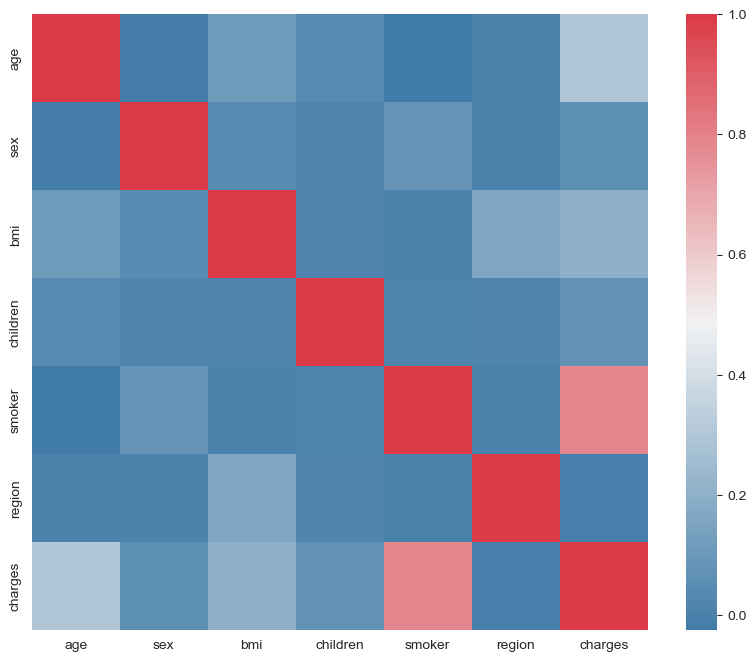

In [174]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with smoking patients. Hence, we will investigate smoking more closely. We can look at the distribution of charges, this will suggest most typical spendings.

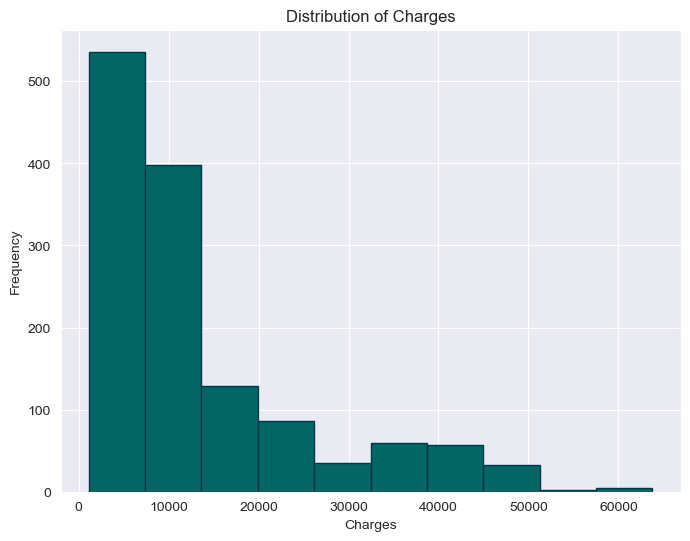

In [175]:
# Assuming 'data.charges' refers to an array of charges
charges = data['charges']

# Create the histogram
hist, edges = np.histogram(charges, bins=10)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Add the histogram bars
ax.bar(edges[:-1], hist, width=np.diff(edges), edgecolor="#033649", color="#036564", align="edge")

# Set the title and labels
ax.set_title("Distribution of Charges")
ax.set_xlabel("Charges")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()

Now we can compare that for smokers and non-smokers.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

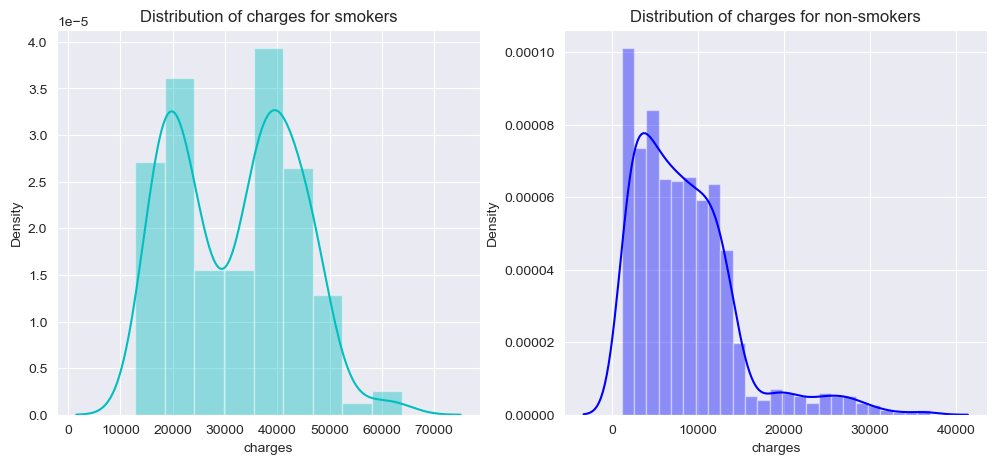

In [176]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

It is now clear that smoking patients spend more on treatment and maximum spending of smokers exceeds those of non-smokers.

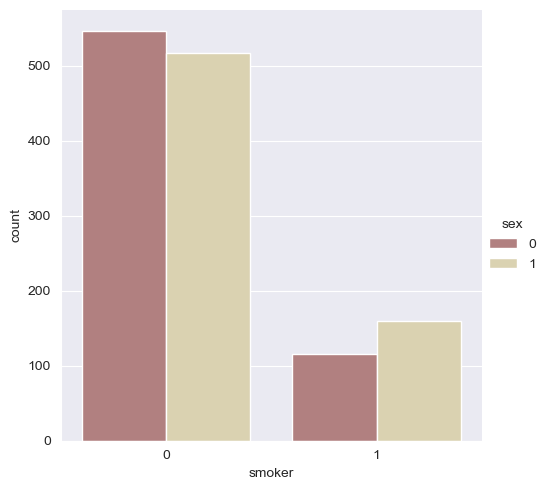

In [177]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

The graph above shows that there are more smoking patients though (women are encoded with "1" and men are encoded with "0"). The graph also shows, that there are  more male smokers, than female smokres, which suggests that the total cost of treatment in men will be higher than for women.

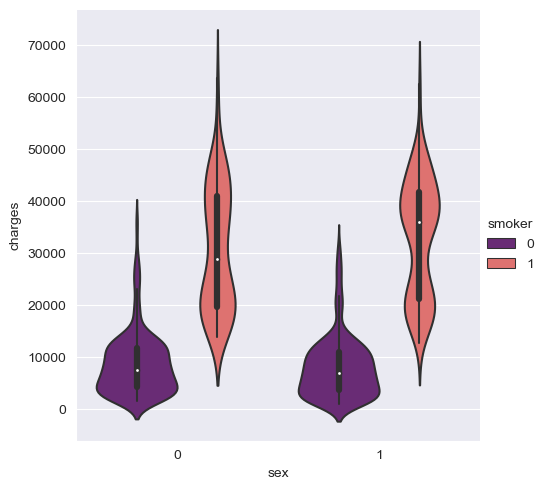

In [178]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

The violin chart unveils that median of charges for smoking women is actually higher than for smoking men (contrary to hypothesis made above), but it is lower for non-smoking women than for non-smoking men. We can take a closer look at charges for women and men below.

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

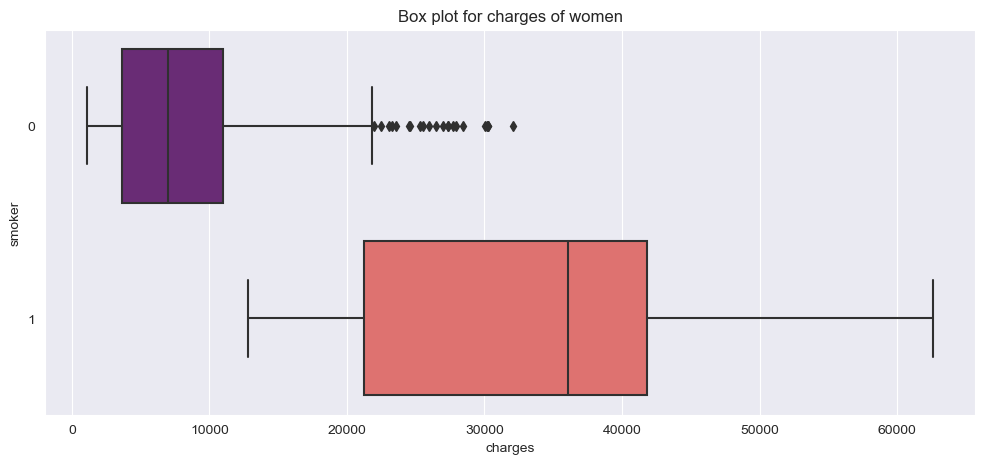

In [179]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

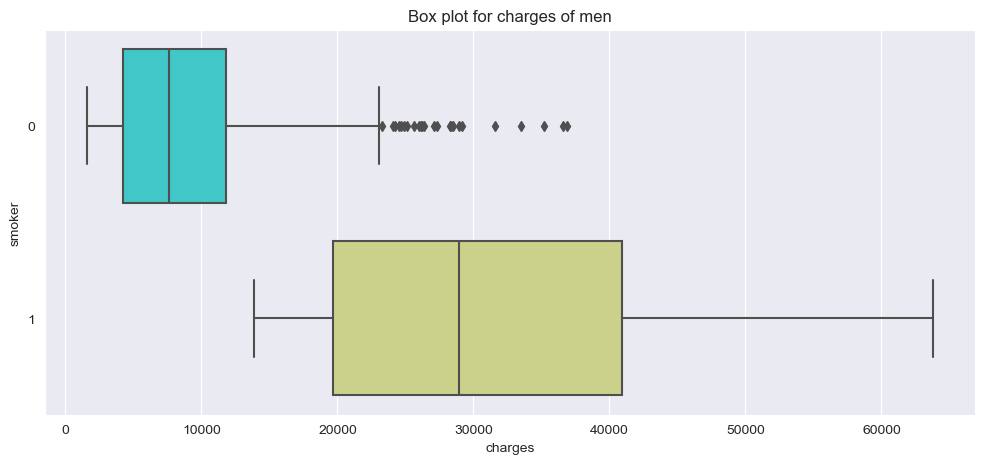

In [180]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

Now let's focus on the age of the patients. It is interesting to check how age affects the cost of treatment, but let's start with the distribution of age.

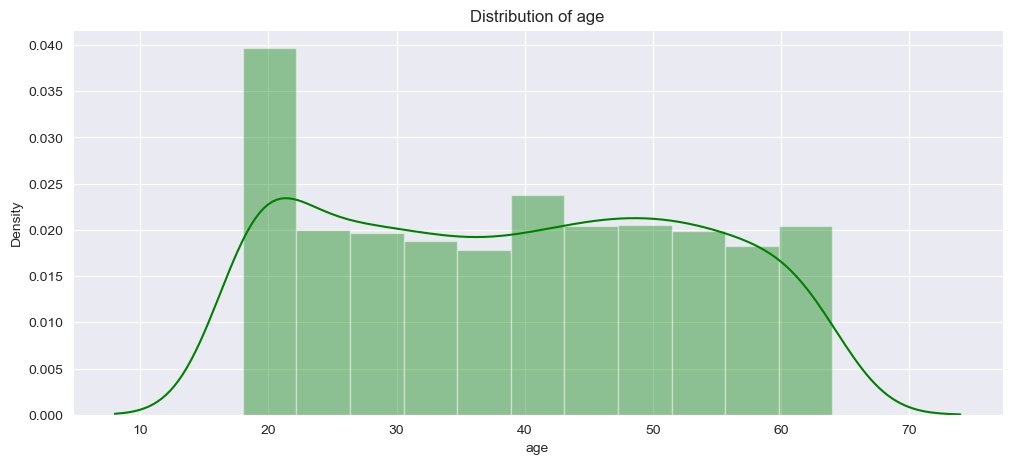

In [181]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

There are patients under 20 in the data set. Since we explored how smoking affects the cost of treatment,let's see if smoking at an early age of 18 affects it as well. Let's start with checking the counts of smokers at this age.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

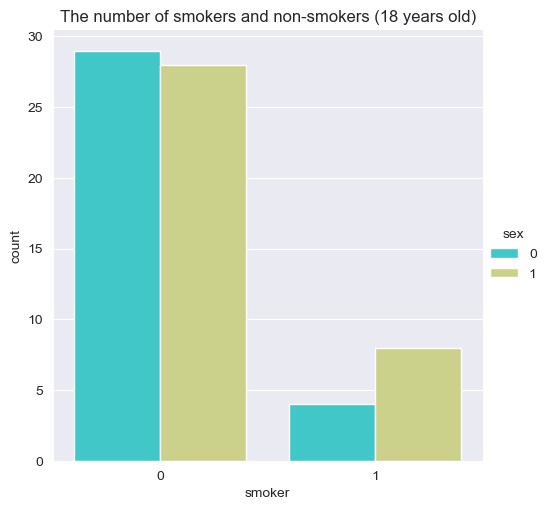

In [182]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

In [183]:
num_smokers_all = data[data.smoker == 1].shape[0]
total_all = data.shape[0]
percentage_smokers_all = (num_smokers_all / total_all) * 100
percentage_smokers_all

20.47832585949178

In [184]:
data_18 = data[data.age == 18]
num_smokers = data_18[data_18.smoker == 1].shape[0]
total_18 = data_18.shape[0]
percentage_smokers = (num_smokers / total_18) * 100
percentage_smokers


17.391304347826086

There are 17.4% of smokers at the age of 18, compared to 20.5% of smokers overall. Now let's see if smoking affects the cost of treatment at this age (we can assume that those youngsters have just started smoking).

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

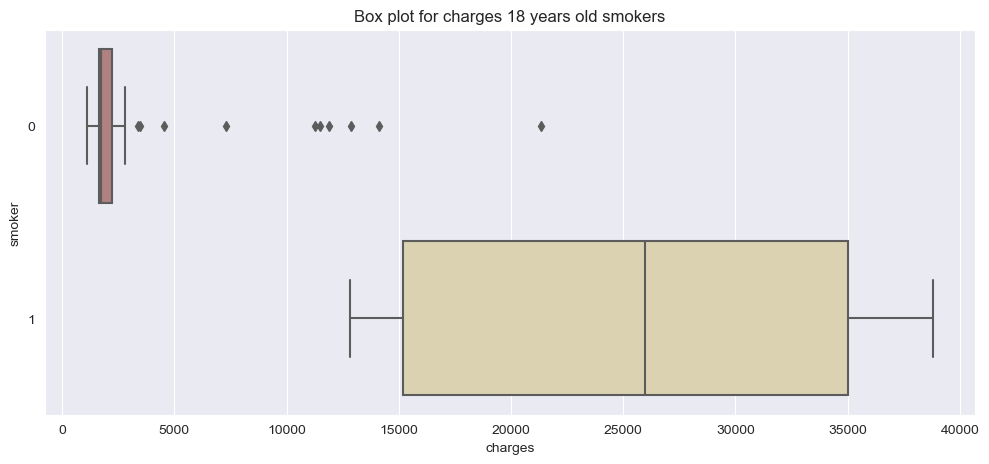

In [185]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

The result is actually really surprising. Even at the age of 18, smokers spend much more on treatment than non-smokers. Among non-smokers we can see some outliers. We can assume that this is due to serious diseases or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

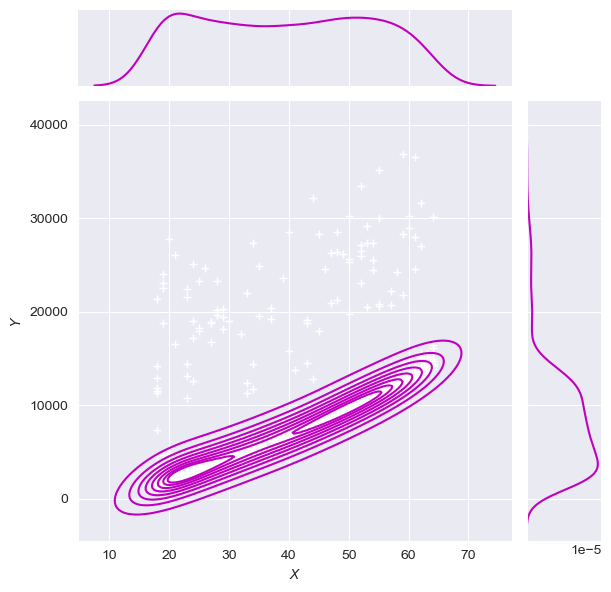

In [186]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

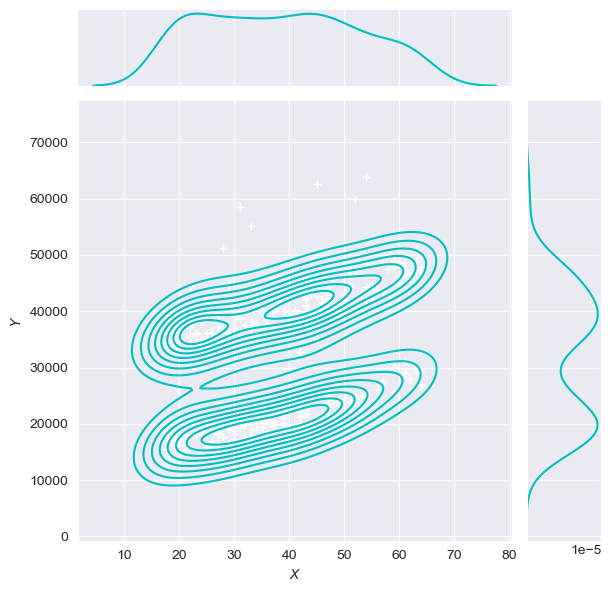

In [187]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

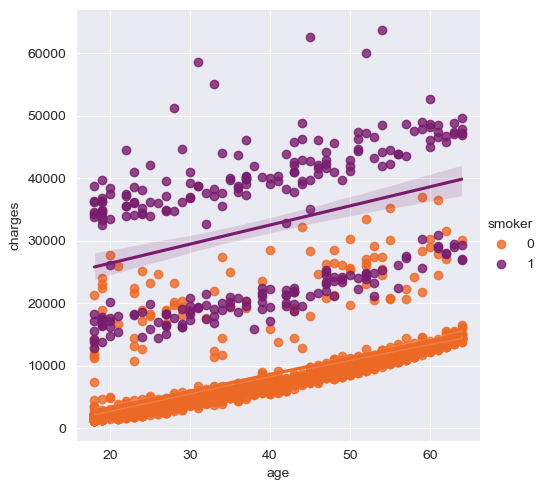

In [188]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

We can see that in both cases, the cost of treatment increases with age, which is sensible. There is something interesting, relating to smokers, they seem to be divided into two groups, one in the lower-end of charges and the other in the upper-end of charges. This is definitely not age related, as the graph does not explain this. Let's set it with bmi then.

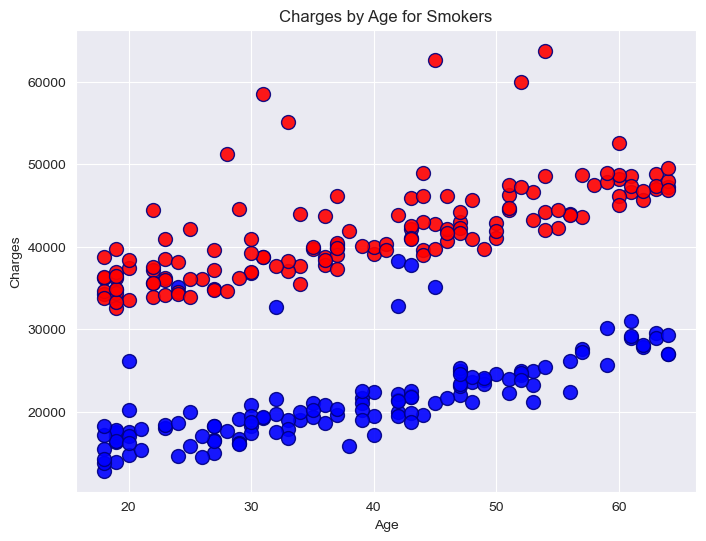

In [189]:
import matplotlib.pyplot as plt
import pandas as pd



# Create the 'color' column based on the 'bmi' value
data['color'] = data['bmi'].apply(lambda x: 'red' if x > 30 else 'blue')

# Create a scatter plot
plt.figure(figsize=(8, 6))
for idx, row in data.iterrows():
    if row['smoker'] == 1:
        plt.scatter(row['age'], row['charges'], color=row['color'], edgecolor='navy', s=100, alpha=0.9)

# Set the title and labels
plt.title('Charges by Age for Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show the plot
plt.show()


Now it's clear that higher charges in smokers occur, when BMI > 30. That's a very interesting finding! Smoking and high BMI is a dangerous combination.

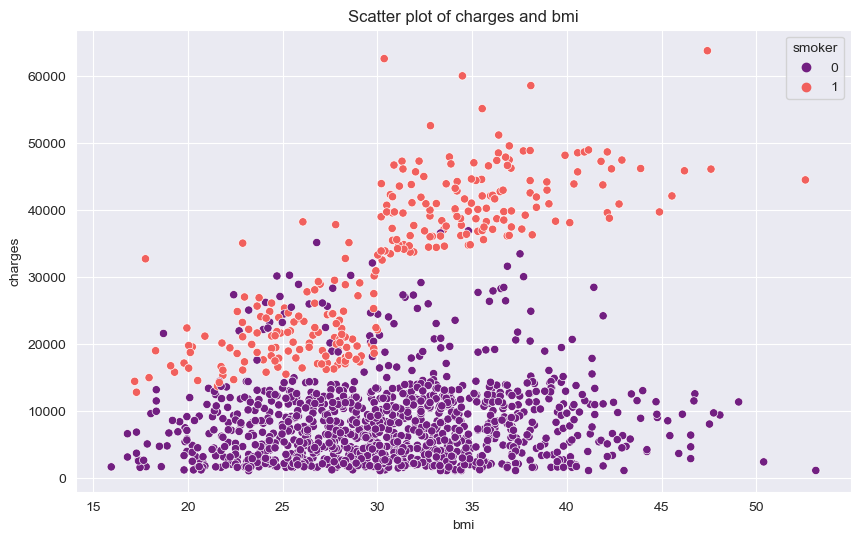

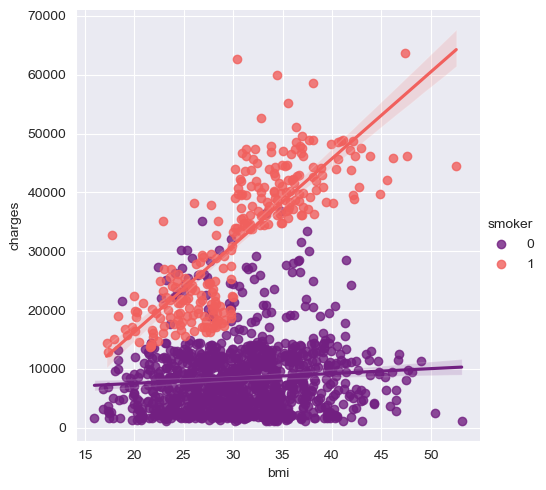

In [190]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

This shows another interesting thing: high BMI does not necessarily lead to higher charges, it's the smoking indeed (as seen earlier in the correlation!) affects charges the most. This is also proven below.

Before moving onto regression, let's look at the number of children that patients have.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

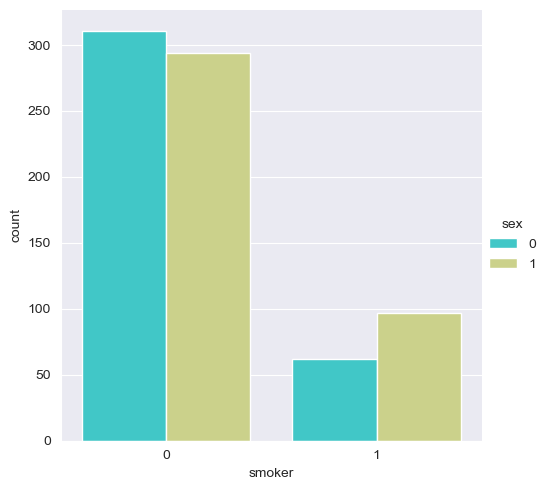

In [192]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

In [193]:
data_child = data[data.children > 0]
num_smokers_child = data_child[data_child.smoker == 1].shape[0]
total_child = data_child.shape[0]
percentage_smokers_child = (num_smokers_child / total_child) * 100
percentage_smokers_child


20.81151832460733

20.8% of parents are smokers, that is slightly higher than the average calculated above. Not very positive!